GETTING THE DATASET

In [0]:
import keras
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.models import Model
from keras.utils import plot_model
imdb = keras.datasets.imdb
#loading only the top 10000 words in the vocabulary like you did last week.
VOCAB_SIZE = 10000
#we reserve indices 0 for ‘<PAD>’, 1 for ‘<START>’ and 2 for ‘<UNK>’ i.e. words not in vocabulary
INDEX_FROM = 3 # ​EDITED
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,
index_from=INDEX_FROM)


SANITY CHECK

In [78]:
# Each instance in the training data is a list of word indices representing the words in the review
>>> print('Sample review:', train_data[0])
# and each label is 1 if that review is positive, else 0
>>> print('\n Sample label:', test_labels[1])

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

 Sample label: 1


INPUT FOR LSTM

In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500
preprocessed_train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=MAXIMUM_LENGTH, padding='pre')

preprocessed_test_data =  keras.preprocessing.sequence.pad_sequences(test_data, maxlen=MAXIMUM_LENGTH, padding='pre')



SANITY CHECK

In [80]:
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


BUILDING THE MODEL

In [81]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
EMBED_SIZE = 100
inputlayer = Input((500,), dtype='int32')
embedding_layer = Embedding(output_dim = 100,input_dim = VOCAB_SIZE, name='embed_layer', embeddings_initializer='glorot_uniform')(inputlayer)

LSTM_layer = LSTM(units = 100, activation = 'tanh')(embedding_layer)
Output_layer =  Dense(1,activation='sigmoid',input_shape=(500,))(LSTM_layer)
model = Sequential()
model.add(Embedding(output_dim = EMBED_SIZE,input_dim = VOCAB_SIZE, name = 'Embed'))
model.add(LSTM(100, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model = Model(inputs= inputlayer, outputs= Output_layer)
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embed_layer (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


SANITY CHECK

In [82]:
print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embed_layer (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


VISUALIZING THE MODEL STRUCTURE

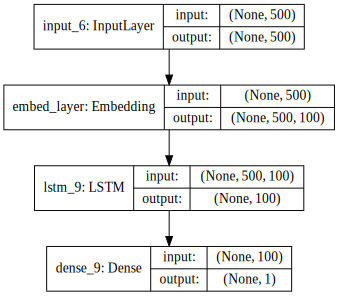

In [83]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=70).create(prog='dot', format='svg'))


TRAINING THE MODEL

In [0]:
import numpy as np

from sklearn.model_selection import train_test_split #Using sklearn to split data for the validation set
train_data, test_data, train_labels, test_labels = train_test_split(preprocessed_train_data, train_labels, test_size=0.08)


In [85]:
print(len(preprocessed_test_data))
print(len(test_labels))

25000
2000


In [86]:
print(train_data.shape)
print(train_labels.shape)
history = model.fit(train_data,
                    train_labels,
                    epochs=3,
                    batch_size=100,
                    validation_data=(test_data, test_labels),
                    verbose=1)

(23000, 500)
(23000,)
Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 167s 7ms/step - loss: 0.5037 - acc: 0.7523 - val_loss: 0.3503 - val_acc: 0.8525
Epoch 2/3
23000/23000 [==============================] - 162s 7ms/step - loss: 0.2833 - acc: 0.8876 - val_loss: 0.3494 - val_acc: 0.8530
Epoch 3/3
23000/23000 [==============================] - 160s 7ms/step - loss: 0.2264 - acc: 0.9139 - val_loss: 0.3240 - val_acc: 0.8725


PLOT TRAINING AND VALIDATION ACCURACY

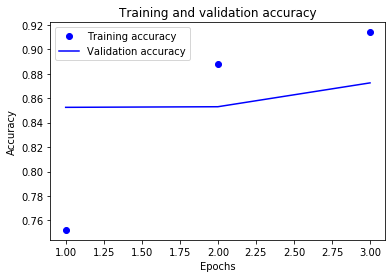

In [87]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

EVALUATING THE MODEL ON TEST DATA

In [88]:
results = model.evaluate(test_data, test_labels)
print('test_loss:', results[0], 'test_accuracy:', results[1])

2000/2000 [==============================] - 16s 8ms/step
test_loss: 0.3239820536971092 test_accuracy: 0.8725


EXTRACTING WORD EMBEDDINGS

In [89]:
model.get_layer('embed_layer').get_weights()[0]

array([[-0.02140076, -0.01112747, -0.01760207, ...,  0.02179185,
         0.01343908,  0.03203207],
       [ 0.07328179,  0.10058188,  0.09007257, ..., -0.15526769,
        -0.12184276, -0.13145065],
       [-0.02314287, -0.02142331, -0.00449272, ...,  0.0165268 ,
         0.0096979 , -0.00710953],
       ...,
       [ 0.02484035,  0.01997929,  0.00099922, ..., -0.00753175,
         0.00553301, -0.01593243],
       [-0.02107827,  0.00553455, -0.02337138, ...,  0.01209181,
        -0.00460709,  0.02810819],
       [ 0.05281347,  0.05273856,  0.05018446, ..., -0.0389421 ,
        -0.05133878, -0.05677344]], dtype=float32)

SANITY CHECK

In [90]:
word_embeddings = model.get_layer('embed_layer').get_weights()[0]
print('Shape of word_embeddings:', word_embeddings.shape)
print(word_embeddings)

Shape of word_embeddings: (10000, 100)
[[-0.02140076 -0.01112747 -0.01760207 ...  0.02179185  0.01343908
   0.03203207]
 [ 0.07328179  0.10058188  0.09007257 ... -0.15526769 -0.12184276
  -0.13145065]
 [-0.02314287 -0.02142331 -0.00449272 ...  0.0165268   0.0096979
  -0.00710953]
 ...
 [ 0.02484035  0.01997929  0.00099922 ... -0.00753175  0.00553301
  -0.01593243]
 [-0.02107827  0.00553455 -0.02337138 ...  0.01209181 -0.00460709
   0.02810819]
 [ 0.05281347  0.05273856  0.05018446 ... -0.0389421  -0.05133878
  -0.05677344]]


In [91]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embed_layer (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


VISUALIZING THE REVIEWS

In [0]:
word2idx = imdb.get_word_index()
# 9998 since we only used top 1000 words of including ‘<PAD>’, ‘<START>’ and ‘<UNK>’
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2

In [0]:
idx2word = {v: k for k, v in word2idx.items()}

In [103]:
print(' '.join(idx2word[idx] for idx in train_data[0]))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [0]:
print(train_data[0])

In [95]:
from pandas import DataFrame
print(DataFrame(word_embeddings, index=idx2word.values()).head(10))

                 0         1         2   ...        97        98        99
woods     -0.021401 -0.011127 -0.017602  ...  0.021792  0.013439  0.032032
hanging    0.073282  0.100582  0.090073  ... -0.155268 -0.121843 -0.131451
woody     -0.023143 -0.021423 -0.004493  ...  0.016527  0.009698 -0.007110
arranged   0.007724 -0.005802  0.004840  ... -0.019609 -0.015266  0.006529
bringing   0.017096  0.019018 -0.009733  ...  0.017845 -0.008937 -0.019224
wooden     0.028228  0.023226  0.012033  ... -0.007495 -0.000646 -0.016155
errors     0.021319 -0.012416  0.024095  ... -0.027852 -0.004959  0.000958
dialogs   -0.011894  0.006411 -0.001722  ...  0.003113 -0.026298 -0.022275
kids       0.022731  0.006530  0.000854  ... -0.013936  0.016237  0.009757
uplifting  0.025406 -0.011968  0.021350  ...  0.009790 -0.005522 -0.011830

[10 rows x 100 columns]


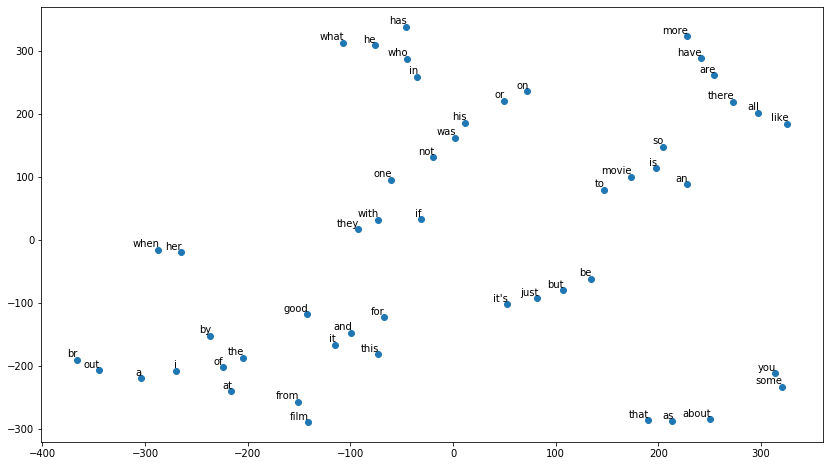

In [96]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
start = 3
plot_only = 54
T = tsne.fit_transform(word_embeddings[start:plot_only, :])
labels_1 = [idx2word[i+1] for i in range(start, plot_only)]

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels_1, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points',ha='right',va='bottom')

### TESTING WITH 32 

In [97]:
input_1 = Input((500,), dtype='int32')
embedding_layer = Embedding(output_dim = 100,input_dim = VOCAB_SIZE, name='elayer', embeddings_initializer='glorot_uniform')(input_1)
dropout1 = keras.layers.Dropout(0.1, noise_shape=None, seed=None)(embedding_layer)
LSTM_layer = LSTM(units = 100, activation = 'tanh')(dropout1)
dropout2 = keras.layers.Dropout(0.1, noise_shape=None, seed=None)(LSTM_layer)
Output_layer =  Dense(1,activation='sigmoid',input_shape=(500,))(dropout2)

model_1 = Model(inputs= input_1, outputs= Output_layer)
model_1.compile(optimizer= 'adam', loss='binary_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 500)               0         
_________________________________________________________________
elayer (Embedding)           (None, 500, 100)          1000000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________

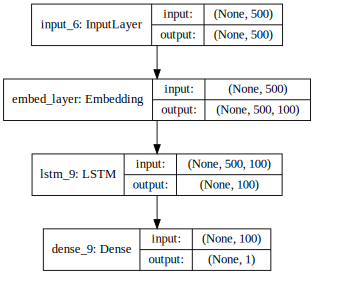

In [98]:
SVG(vis_utils.model_to_dot(
model, show_shapes=True, show_layer_names=True,dpi =65).create(prog='dot', format='svg'))

In [99]:
history = model_1.fit(train_data,
                   train_labels,
                    epochs=3,
                    batch_size=100,
                    validation_data =(test_data, test_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 163s 7ms/step - loss: 0.4605 - acc: 0.7686 - val_loss: 0.4175 - val_acc: 0.8135
Epoch 2/3
23000/23000 [==============================] - 164s 7ms/step - loss: 0.2721 - acc: 0.8913 - val_loss: 0.3161 - val_acc: 0.8630
Epoch 3/3
23000/23000 [==============================] - 161s 7ms/step - loss: 0.2319 - acc: 0.9101 - val_loss: 0.3175 - val_acc: 0.8760


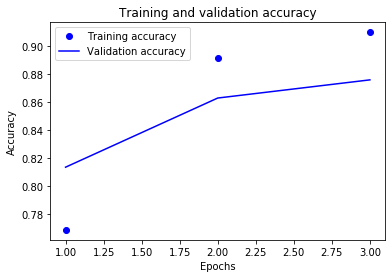

In [100]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
results = model_1.evaluate(test_data, test_labels)
print('test_loss:', results[0], 'test_accuracy:', results[1])

2000/2000 [==============================] - 16s 8ms/step
test_loss: 0.3175482208132744 test_accuracy: 0.876
